In [1]:
# 지도 학습 (Supervised learning)
# 입력값<특징>과 원하는 결과<레이블>를 알려주고 학습하게 하는 방법
# X, Y가 둘다 있어야 학습 시킬 수 있다.

# 비지도 학습 (Unsupervised learning)
# 입력값으로부터 데이터의 특징 <특징은 알다시피 입력값의 특징이다. 출력이 아니다!>을 찾아내는 학습방법
# X만 있어도 학습 시킬 수 있다.

# 비지도 학습중에서 가장 널리 쓰이는 신경망이 바로 오토인코더(Autoencoder)가 있다.

# 오토인코더는 입력값과 출력값을 같게하는 신경망이고, 은닉층 수가 입력-출력값보다 적은점이 특징이다.
# 이런 구조를 통해 입력 데이터를 압축하는 효과와 더불어 노이즈 제거에도 효과적이다.

# 구현을 위해 tensorflow, numpy, matplotlib.pyplot을 임포팅하자
# 그리고 MNIST 의 입력 데이터도 임포팅하자

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# 이번에는 아래와 같이 하이퍼파라미터로 사용될 옵션들을 따로 빼보자

hp_learning_rate = 0.01  # 최적화 함수에서 사용할 학습률
hp_training_epoch = 20   # 전체 데이터를 학습할 총 횟수(에포크수)
hp_batch_size = 100      # 미니배치로 한번에 학습할 데이터의 갯수
hp_num_hidden = 256      # 은닉층 뉴런 갯수
hp_num_input = 28*28     # MNIST 이미지 픽셀수


# 다음은 플레이스 홀더 정의다.
# 이 모델은 비지도 학습이므로 X만 정의하면 된다.

X = tf.placeholder(tf.float32, [None, hp_num_input])
print("X:", X)

X: Tensor("Placeholder:0", shape=(?, 784), dtype=float32)


In [3]:
# 오토인코더는 인코더와 디코더를 만드는 것이 핵심이다.

# 먼저 인코더부터 정의해보자
# 인코더는 입력층에서 은닉층으로 가는 부분이다.
W_encode = tf.Variable(tf.random_normal([hp_num_input, hp_num_hidden]))
b_encode = tf.Variable(tf.random_normal([hp_num_hidden]))
# 여기에서는 활성화 함수를 sigmoid 함수로 적용하도록 한다.
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

# 그 다음은 디코더이다.
W_decode = tf.Variable(tf.random_normal([hp_num_hidden, hp_num_input]))
b_decode = tf.Variable(tf.random_normal([hp_num_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

# 디코더의 출력층 크기는 입력층 크기와 같다.

In [4]:
# 이번에는 손실함수를 만들 차례이다.

# 현재 만들고 있는 오토인코더의 목적은 출력값을 입력값과 가장 비슷하게 만드는 것이다.
# 그렇게 함으로써 압축된 은닉층의 뉴런들을 통해서 입력값의 특징을 알아낼 수 있다.
# 그러므로 입력값인 X를 평가하기 위한 실측값으로 이용하고, 이것과 디코더의 결과값의 차이를 손실값으로 설정하도록 한다.

cost = tf.reduce_mean(tf.pow(X - decoder, 2))

# 최적화 함수는 RMSPropOptimizer라는 함수를 사용한다.
optimizer = tf.train.RMSPropOptimizer(hp_learning_rate).minimize(cost)

In [5]:
# 그리고 전때와 마찬가지로 학습을 진행하는 코드를 작성한다.
# 단, 하이퍼 파라미터로 지정하였던 코드를 활용하도록 하자.

# 세션 시작
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / hp_batch_size)

for epoch in range(hp_training_epoch):
    total_cost = 0
    
    for i in range(total_batch):

        batch_xs, batch_ys = mnist.train.next_batch(hp_batch_size)

        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.200
Epoch: 0002 Avg. cost = 0.057
Epoch: 0003 Avg. cost = 0.048
Epoch: 0004 Avg. cost = 0.043
Epoch: 0005 Avg. cost = 0.040
Epoch: 0006 Avg. cost = 0.037
Epoch: 0007 Avg. cost = 0.036
Epoch: 0008 Avg. cost = 0.035
Epoch: 0009 Avg. cost = 0.035
Epoch: 0010 Avg. cost = 0.033
Epoch: 0011 Avg. cost = 0.033
Epoch: 0012 Avg. cost = 0.032
Epoch: 0013 Avg. cost = 0.032
Epoch: 0014 Avg. cost = 0.032
Epoch: 0015 Avg. cost = 0.032
Epoch: 0016 Avg. cost = 0.031
Epoch: 0017 Avg. cost = 0.031
Epoch: 0018 Avg. cost = 0.031
Epoch: 0019 Avg. cost = 0.031
Epoch: 0020 Avg. cost = 0.030
최적화 완료!


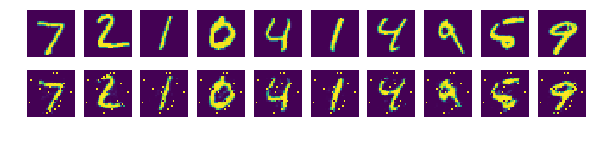

In [6]:
# 이번에는 결괏값을 정확도가 아닌 디코더로 생성해낸 결과를 직관적인 방법으로 확인해 보도록 하자.
# matplotlib을 이용한다.

sample_size = 10

# MNIST 테스트 이미지중 샘플사이즈만큼의 테스트데이터를 가져와서 디코더 출력값을 만든다.
samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

# 그 다음 numpy 모듈을 이용하여 MNIST 데이터를 28*28 이미지로 재구성하고,
# matplotlib의 imshow()를 이용하여 그래프에 이미지로 출력한다.
# 위에 값은 입력값, 아래 값은 신경망을 통해 생성된 이미지를 출력한다.

fig, ax = plt.subplots(
    2, 
    sample_size,
    figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    # 입력 이미지를 출력
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    # 신경망을 통해 나온 이미지를 출력
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
    
plt.show()

sess.close()